In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# module to do peak search
from scipy.signal import argrelextrema

read side-hole.imp to check impedance peaks

In [3]:
# read data
dd = pd.read_csv('side-hole.imp',header=0)

In [4]:
x = dd.iloc[:,0].values
y = dd.iloc[:,3].values

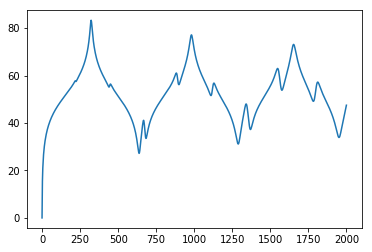

In [13]:
p = plt.plot(x,y)

In [5]:
idx = argrelextrema(y, np.greater);
idx

(array([ 87, 129, 180, 267, 353, 393, 452, 536, 619, 661, 725]),)

Let's take 2nd to last point for an example.

In [67]:
ii = idx[0][-2]

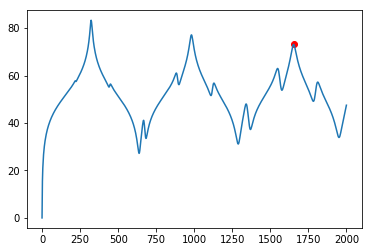

In [68]:
plt.plot(x,y)
plt.scatter(x[ii],y[ii],color = 'red')

In [69]:
x[ii]

1652.5

run calcprs to make L,D,pressure data file.

In [70]:
!python ../../calcprs.py -f 1652.5 'side-hole.xmen'

In [71]:
prs1 = pd.read_csv('side-hole.prs',header=1)

/home/yoshinobu/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


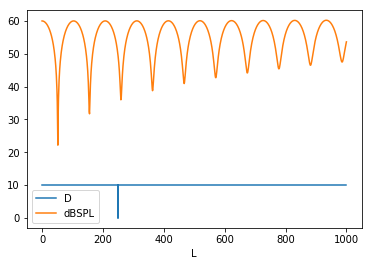

In [72]:
prs1.plot('L',['D','dBSPL'])

Down line near L=250 means there is a child path connected.
This case it is a side hole.

## Comparison of calculation direction

Compare pressure calculated from End (default) and Head.

In [73]:
!python ../../calcprs.py -f 1652.5 -T -o 'side-hole-tail.prs' 'side-hole.xmen'

In [74]:
prs2 = pd.read_csv('side-hole-tail.prs',header=1)

/home/yoshinobu/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


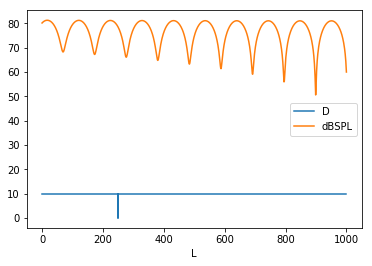

In [75]:
prs2.plot('L',['D','dBSPL'])

Of course it is natural to calculate from head.

### 1st large peak

Let's check each peaks one by one

In [42]:
ii = idx[0][1]
x[ii]

322.5

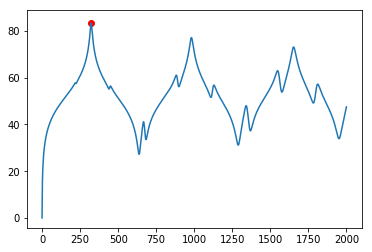

In [43]:
plt.plot(x,y)
plt.scatter(x[ii],y[ii],color='r')

In [76]:
!python ../../calcprs.py -f 322.5 -o p1.prs side-hole.xmen

In [77]:
p1 = pd.read_csv('p1.prs',header=1)

/home/yoshinobu/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


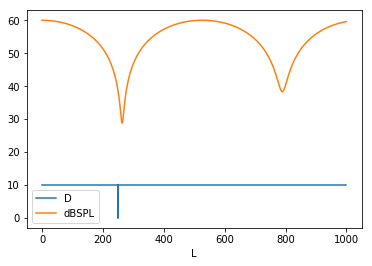

In [78]:
p1.plot('L', ['D','dBSPL'])

The side hole makes a pressure node there, even if pressure at main end is not a node.

### 2nd large peak

In [79]:
ii = idx[0][5]
x[ii]

982.5

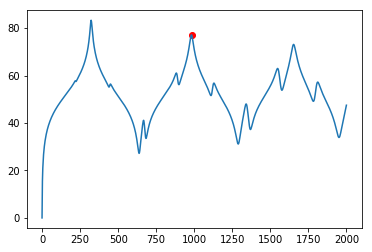

In [80]:
plt.plot(x,y)
plt.scatter(x[ii],y[ii],color='r')

In [81]:
!python ../../calcprs.py -f 982.5 -o p2.prs side-hole.xmen

In [82]:
p2 = pd.read_csv('p2.prs',header=1)

/home/yoshinobu/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


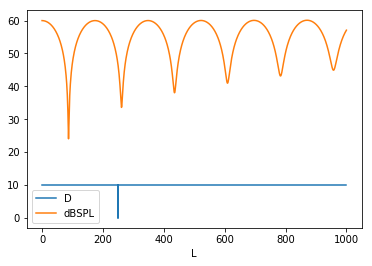

In [83]:
p2.plot('L', ['D','dBSPL'])

Again , side hole makes a pressure node.

### 8th peak

Comparing with simple.xmen impedance, 
it will be known that 8th peak is near to impedance node of without side-hole.

In [84]:
ii = idx[0][8]
x[ii]

1547.5

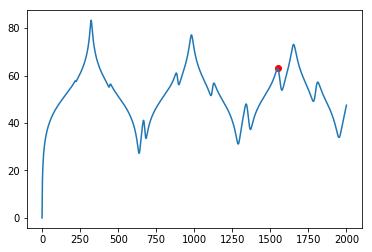

In [85]:
plt.plot(x,y)
plt.scatter(x[ii],y[ii],color='r')

In [86]:
!python ../../calcprs.py -f 1547.5 -o p8.prs side-hole.xmen

In [87]:
p8 = pd.read_csv('p8.prs',header=1)

/home/yoshinobu/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


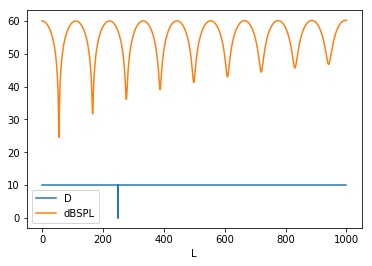

In [88]:
p8.plot('L', ['D','dBSPL'])